# Лабораторная работа 1

## Цель работы: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество. 

 

## Постановка задачи: 

* Провести обучение модели линейной регрессии на датасете с Kaggle: 

* Загрузить датасет из репозитория (например, kaggle.com или аналогичных платформ). 

* Подготовить данные: провести первичный анализ, визуализировать распределение признаков и целевой переменной.  

* Провести предобработку данных: удалить пропущенные значения, закодировать категориальные переменные (опционально). 

* Построить матрицу корреляций. Сделать выводы о наличии мультиколлинеарности (расчет VIF-коэффициента). 

* Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error). 

* Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA). Перед проведением PCA провести стандартизацию данных. 

* Повторить шаг 5 (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты.Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах. 

### 1. Описание датасета.
В данной лабораторной работе используется стандартный датасет Diabetes из библиотеки scikit-learn. Датасет содержит сведения о 442 пациентах и включает 10 числовых признаков, описывающих состояние человека: возраст (age), пол (sex), индекс массы тела (bmi), артериальное давление (bp) и различные биохимические показатели крови (s1–s6)

Целевая переменная (target) — количественный показатель прогрессирования диабета через один год. 
Модель линейной регрессии должна по наборам признаков предсказать значение этой целевой переменной

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print(f"Shape X: {X.shape}")

X.head()

display(X.describe().transpose())
display(y.describe())

print("Пропуски по признакам:\n", X.isnull().sum())
print("\nПропуски в целевой переменной:", y.isnull().sum())

Shape X: (442, 10)


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Пропуски по признакам:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Пропуски в целевой переменной: 0


Пропущенные значения отсутствуют, что подтверждается анализом с помощью isnull().sum(). Описательная статистика показывает, что признаки предварительно нормализованы (среднее близко к 0 и небольшое стандартное отклонение), что упрощает их дальнейшую обработку, но мы все равно выполним маштабирование

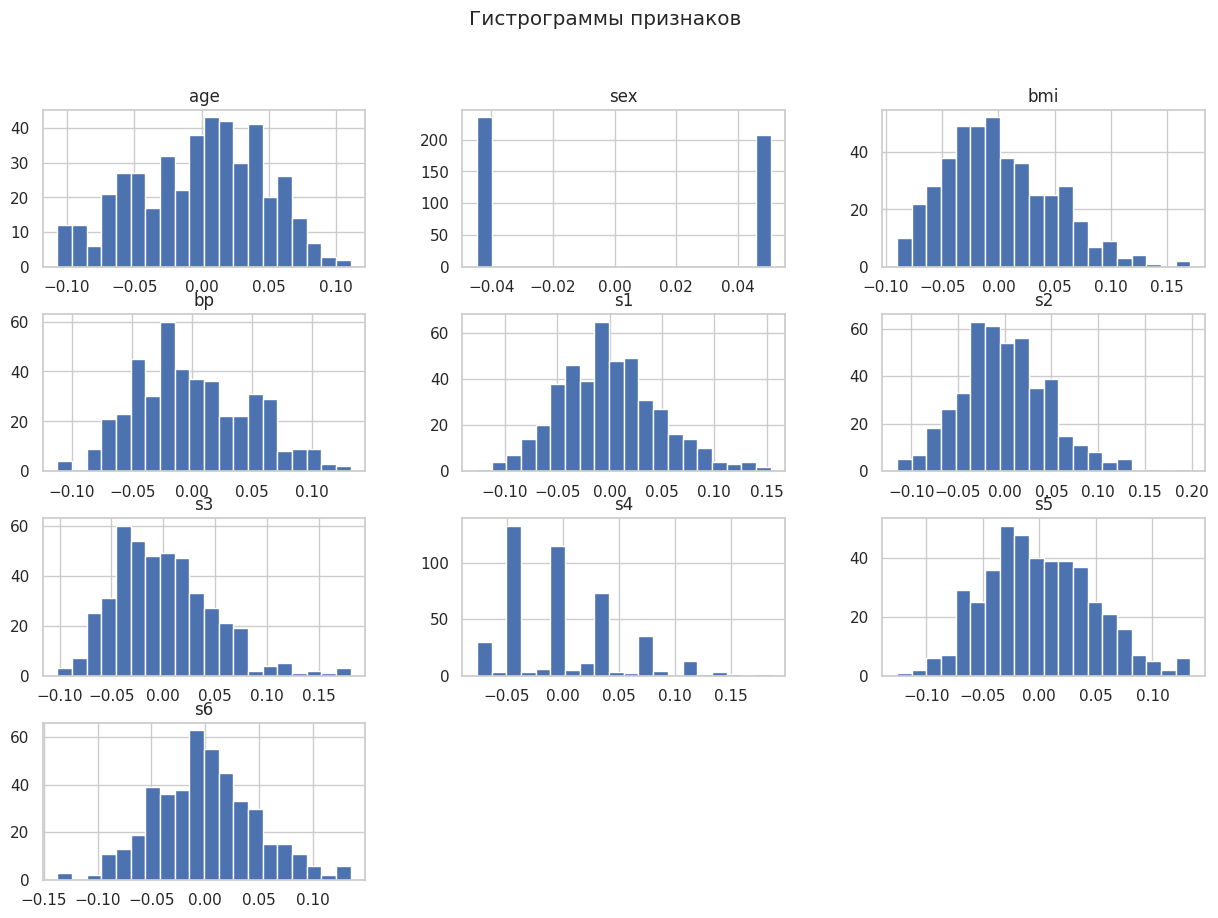

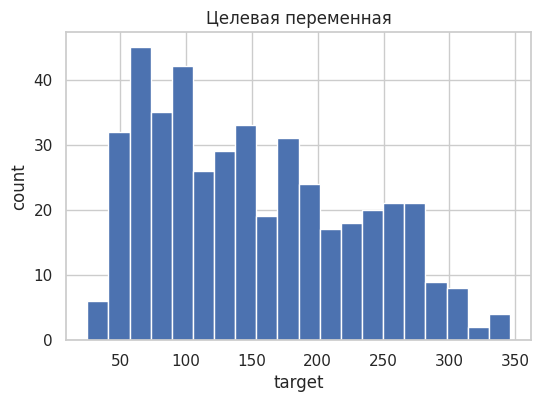

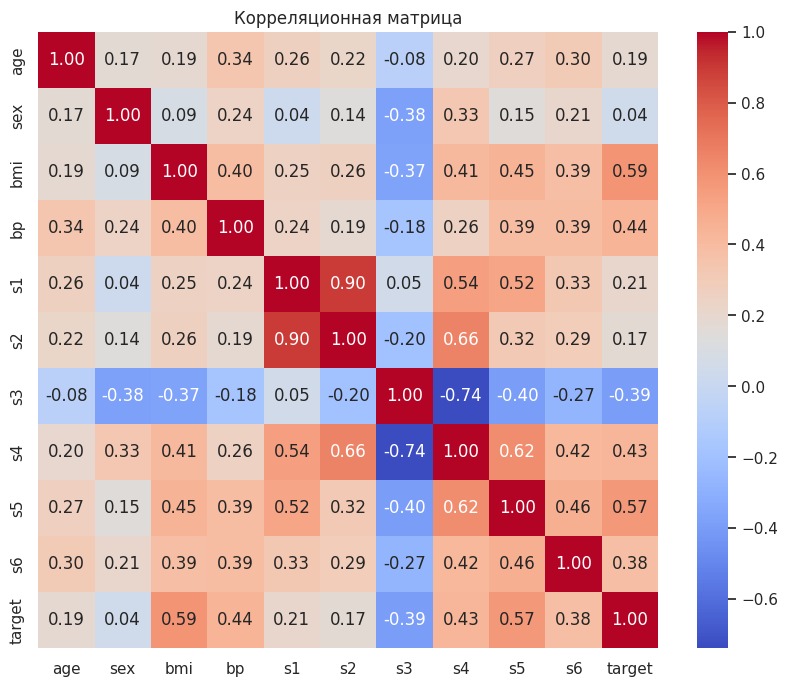

Топ-3 признака по корреляции с целевой переменной: ['bmi', 's5', 'bp']


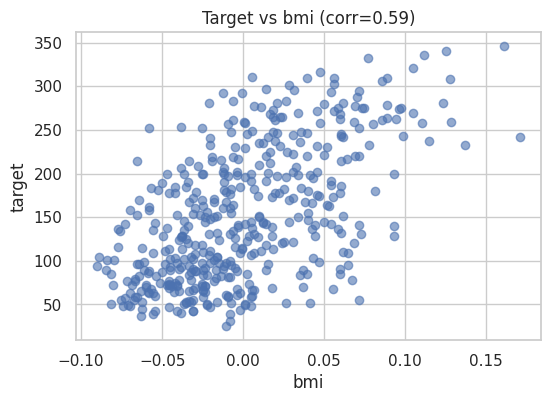

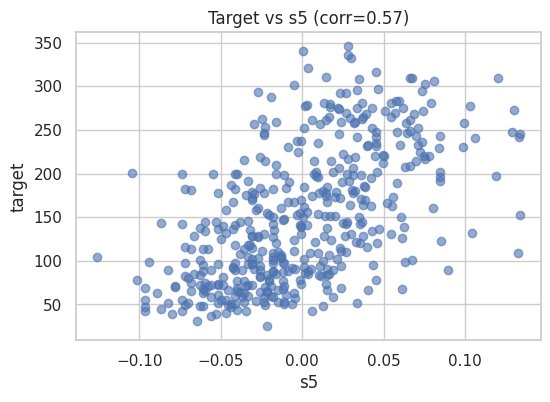

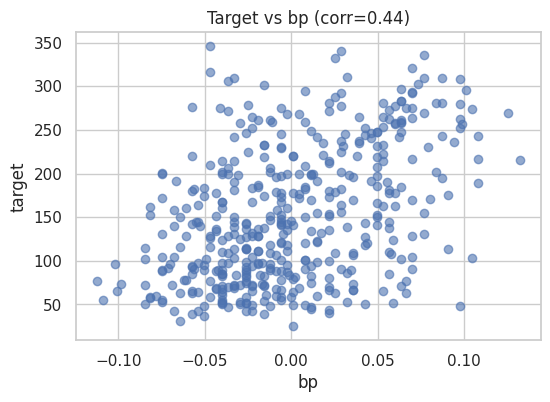

In [ ]:
X.hist(figsize=(15, 10), bins=20)
plt.suptitle("Гистрограммы признаков")
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(y, bins=20)
plt.title("Целевая переменная")
plt.xlabel("target")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

corr = pd.concat([X, y], axis=1).corr()
top3 = corr["target"].drop("target").abs().sort_values(ascending=False).head(3).index.tolist()

print("Топ-3 признака по корреляции с целевой переменной:", top3)

for feat in top3:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[feat], y, alpha=0.6)
    plt.xlabel(feat)
    plt.ylabel("target")
    plt.title(f"Target vs {feat} (corr={corr.loc[feat, 'target']:.2f})")
    plt.show()

Большинство признаков имеют распределения, близкие к нормальным, но возможны небольшие смещения и отдельные выбросы. Целевая переменная распределена в диапазоне от 25 до 346 со средним значением около 152.

Корреляционная матрица показывает наличие умеренных связей между некоторыми признаками и целевой переменной. Наиболее сильную корреляцию с target демонстрируют признаки, связанные с биохимическими показателями крови и индекс массы тела (bmi, s5, bp). Это подтверждает пригодность датасета для задачи линейной регрессии. 

### 3. Подготовка данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes after split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X.columns)

print("\nСтатистика масштабированных признаков (train):")
display(X_train_scaled.describe().transpose()[["mean","std"]])

print("\nСтатистика масштабированных признаков (test):")
display(X_test_scaled.describe().transpose()[["mean","std"]])


Shapes after split:
X_train: (353, 10)
X_test: (89, 10)

Статистика масштабированных признаков (train):


,mean,std
age,1.509652e-17,1.001419
sex,6.290215e-17,1.001419
bmi,-6.290215e-17,1.001419
bp,1.509652e-17,1.001419
s1,-3.774129e-17,1.001419
s2,-2.516086e-18,1.001419
s3,5.032172e-17,1.001419
s4,2.717373e-16,1.001419
s5,4.025738e-17,1.001419
s6,-4.528955e-17,1.001419



Статистика масштабированных признаков (test):


,mean,std
age,-0.154759,1.130269
sex,-0.019196,1.004329
bmi,-0.182591,1.029885
bp,-0.121016,0.909809
s1,0.057815,0.988191
s2,0.084158,1.002971
s3,0.104555,1.062588
s4,-0.039187,0.988490
s5,-0.126450,0.978495
s6,-0.194390,0.909288


Перед обучением данные будут разделены на обучающую (train) и тестовую (test) выборки методом train_test_split. Это делается для того, чтобы: 

* обучать модель на одной части данных

* проверять качество на другой, ранее «невидимой» части

* избежать переобучения

Использую разбиение в пропорции 80% на обучение и 20% на тестирование. 

При дальнейших этапах обучения будет использоваться стандартное масштабирование (StandardScaler), которое приводит данные к форме со средним 0 и стандартным отклонением 1. 

Формула

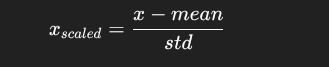

Масштабирование должно выполняться только на обучающей выборке. Если включить тестовые данные в процесс масштабирования, модель косвенно использует статистику будущих наблюдений, которых не должно быть при реальном предсказании. Это делает оценку качества нереалистично высокой и приводит к ухудшению работы модели на новых данных.

### 4. Ход работы

#### 4.1 Построить матрицу корреляций. Сделать выводы о наличии мультиколлинеарности

Для оценки взаимосвязей между признаками выше была построена корреляционная матрица. Некоторые признаки (например, s1, s2, s3, s4, s5) демонстрируют заметные взаимные связи, что может указывать на наличие мультиколлинеарности. Для более точной диагностики был рассчитан коэффициент VIF
Значения VIF < 5 свидетельствуют об отсутствии серьёзной мультиколлинеарности.
Если VIF превышает 5–10, это признак сильной линейной зависимости между признаками.
Формула

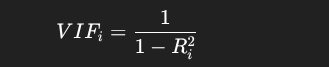

где R² — это насколько признак i можно предсказать по всем остальным признакам.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_scaled_np = X_train_scaled.values
feature_names = X.columns

vif_values = [variance_inflation_factor(X_scaled_np, i) for i in range(X_scaled_np.shape[1])]

vif_df = pd.DataFrame({
    "feature": feature_names,
    "VIF": vif_values
})

vif_df


,feature,VIF
0,age,1.217114
1,sex,1.268854
2,bmi,1.573561
3,bp,1.422084
4,s1,55.252137
5,s2,35.759309
6,s3,14.285594
7,s4,9.333044
8,s5,10.071155
9,s6,1.500654


Признаки s1, s2, s3, s5 — имеют очень сильную мультиколлинеарность

Эти признаки чрезмерно похожи друг на друга
Один практически предсказывается через остальные
Они несут почти ту же информацию, только измеренную по-разному

Это нормально для биохимических данных, с остальными признаками все нормально

#### 4.2 Построить регрессионные модели (линейная и гребневая).

In [15]:
from sklearn.model_selection import  KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mape': 'neg_mean_absolute_percentage_error'
}


def summarize_cv_results(cv_res):
    mean_mse = -np.mean(cv_res['test_neg_mse'])
    mean_rmse = np.sqrt(mean_mse)
    mean_r2 = np.mean(cv_res['test_r2'])
    mean_mape = -np.mean(cv_res['test_neg_mape'])
    return {'RMSE_cv': mean_rmse, 'R2_cv': mean_r2, 'MAPE_cv': mean_mape}

В работе использована 5-кратная кросс-валидация KFold. Метод K-fold CV позволяет более надёжно оценить качество модели, так как каждая часть обучающей выборки по очереди используется и для обучения, и для валидации. Это уменьшает влияние случайного разбиения данных и предотвращает переобучение. Поскольку некоторые метрики в sklearn имеют отрицательный формат (например, neg_mean_squared_error), для удобства мы преобразовали их в привычные положительные значения.

Формула ошибки линейной регрессии:
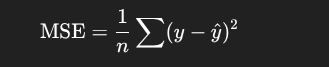

Формула Ridge:
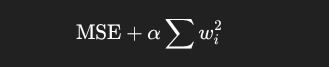

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def mape_manual(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")


cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mape': 'neg_mean_absolute_percentage_error'
}

def summarize_cv_results(cv_res):
    mean_mse  = -np.mean(cv_res['test_neg_mse'])
    mean_rmse = np.sqrt(mean_mse)
    mean_r2   = np.mean(cv_res['test_r2'])
    mean_mape = -np.mean(cv_res['test_neg_mape'])  
    return {'RMSE_cv': mean_rmse, 'R2_cv': mean_r2, 'MAPE_cv': mean_mape}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

cv_res_lr = cross_validate(
    pipe_lr, X_train, y_train,
    cv=cv, scoring=scoring,
    n_jobs=-1, return_train_score=False
)

cv_summary_lr = summarize_cv_results(cv_res_lr)


pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(
    pipe_ridge, param_grid,
    cv=cv, scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)


best_ridge = grid.best_estimator_


cv_res_ridge = cross_validate(
    best_ridge, X_train, y_train,
    cv=cv, scoring=scoring,
    n_jobs=-1, return_train_score=False
)

cv_summary_ridge = summarize_cv_results(cv_res_ridge)


pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

mse_lr  = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr   = r2_score(y_test, y_pred_lr)
mape_lr = mape_manual(y_test.values, y_pred_lr)


best_ridge.fit(X_train, y_train)
y_pred_ridge = best_ridge.predict(X_test)

mse_ridge  = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge   = r2_score(y_test, y_pred_ridge)
mape_ridge = mape_manual(y_test.values, y_pred_ridge)

print("\n--- Результаты на тестовой ---")
print("Linear:  RMSE = {:.3f}, R2 = {:.3f}, MAPE = {:.3%}".format(
    rmse_lr, r2_lr, mape_lr))
print("Ridge :  RMSE = {:.3f}, R2 = {:.3f}, MAPE = {:.3%}".format(
    rmse_ridge, r2_ridge, mape_ridge))

results = pd.DataFrame({
    'model': ['Linear', 'Ridge'],
    'RMSE_cv': [cv_summary_lr['RMSE_cv'], cv_summary_ridge['RMSE_cv']],
    'R2_cv':   [cv_summary_lr['R2_cv'],   cv_summary_ridge['R2_cv']],
    'MAPE_cv': [cv_summary_lr['MAPE_cv'], cv_summary_ridge['MAPE_cv']],
    'RMSE_test': [rmse_lr, rmse_ridge],
    'R2_test':   [r2_lr, r2_ridge],
    'MAPE_test': [mape_lr, mape_ridge],
})

display(results)


coefs_lr = pipe_lr.named_steps['lr'].coef_
coefs_ridge = best_ridge.named_steps['ridge'].coef_

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef_linear': coefs_lr,
    'coef_ridge': coefs_ridge
})

print("\nКоэффициенты моделей:")
display(coef_df)



--- Результаты на тестовой ---
Linear:  RMSE = 53.853, R2 = 0.453, MAPE = 37.500%
Ridge :  RMSE = 53.777, R2 = 0.454, MAPE = 37.448%


,model,RMSE_cv,R2_cv,MAPE_cv,RMSE_test,R2_test,MAPE_test
0,Linear,55.444946,0.480365,0.401513,53.853446,0.452603,0.374998
1,Ridge,55.425007,0.480784,0.401155,53.777454,0.454147,0.374482



Коэффициенты моделей:


,feature,coef_linear,coef_ridge
0,age,1.753758,1.807342
1,sex,-11.511809,-11.448190
2,bmi,25.607121,25.732699
3,bp,16.828872,16.734300
4,s1,-44.448856,-34.671954
5,s2,24.640954,17.053075
6,s3,7.676978,3.369914
7,s4,13.138784,11.764260
8,s5,35.161195,31.378384
9,s6,2.351364,2.458139


Линейная регрессия является базовой моделью, которая минимизирует MSE без ограничений на коэффициенты признаков. Однако в условиях высокой мультиколлинеарности (что характерно для признаков s1–s5 данного датасета) коэффициенты становятся нестабильными, что ухудшает обобщающую способность модели. Гребневая регрессия (Ridge) добавляет L2-регуляризацию, штрафуя большие коэффициенты. Это приводит к снижению дисперсии оценок и более устойчивым результатам. 

[0.01, 0.1, 1, 10, 100, 1000]
Взял такие шаги чтобы сильно менялись веса

Гребневая регрессия показала немного более высокое качество по всем метрикам. Это объясняется тем, что Ridge использует L2-регуляризацию, которая снижает переобучение и уменьшает влияние мультиколлинеарности. В частности, в датасете Diabetes признаки s1, s2, s3, s5 имеют высокие значения VIF, и Ridge эффективно «успокаивает» их коэффициенты.
Метрики на тесте практически совпадают с результатами CV, что говорит об отсутствии переобучения.
Ridge снова даёт чуть лучшие показатели, что подтверждает правильность выбора регуляризации.

Оценка качества модели выполнялась как на кросс-валидации, так и на тестовой выборке. 
Кросс-валидация показывает обобщённую способность модели в пределах обучающих данных. 
Тестовые метрики (RMSE_test, R²_test, MAPE_test) необходимы для оценки качества на новых данных, которые модель ранее не видела. 
Сравнение CV и тестовых метрик позволяет выявить переобучение: если тестовые метрики значительно хуже, модель переобучена. 
В данном случае RMSE_test ≈ 53.8 близок к RMSE_cv ≈ 55.4, 
что указывает на хорошую обобщающую способность модели

#### 4.3 Устранить мультиколлинеарность

In [5]:
from sklearn.decomposition import PCA

pipe_pca_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('lr', LinearRegression())
])

cv_res_pca_lr = cross_validate(
    pipe_pca_lr, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1
)
cv_summary_pca_lr = summarize_cv_results(cv_res_pca_lr)
print("PCA + Linear Regression CV:", cv_summary_pca_lr)

pipe_pca_lr.fit(X_train, y_train)
y_pred_pca_lr = pipe_pca_lr.predict(X_test)
rmse_pca_lr = np.sqrt(mean_squared_error(y_test, y_pred_pca_lr))
r2_pca_lr   = r2_score(y_test, y_pred_pca_lr)
mape_pca_lr = mape_manual(y_test.values, y_pred_pca_lr)
print("PCA + Linear Regression Test:", rmse_pca_lr, r2_pca_lr, mape_pca_lr)

pipe_pca_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)), 
    ('ridge', Ridge())
])

param_grid_pca = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid_pca = GridSearchCV(
    pipe_pca_ridge, param_grid_pca,
    cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
)
grid_pca.fit(X_train, y_train)

print("Best alpha (PCA+Ridge):", grid_pca.best_params_)

best_pca_ridge = grid_pca.best_estimator_

cv_res_pca_ridge = cross_validate(
    best_pca_ridge, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1
)
cv_summary_pca_ridge = summarize_cv_results(cv_res_pca_ridge)
print("PCA + Ridge Regression CV:", cv_summary_pca_ridge)


best_pca_ridge.fit(X_train, y_train)
y_pred_pca_ridge = best_pca_ridge.predict(X_test)
rmse_pca_ridge = np.sqrt(mean_squared_error(y_test, y_pred_pca_ridge))
r2_pca_ridge   = r2_score(y_test, y_pred_pca_ridge)
mape_pca_ridge = mape_manual(y_test.values, y_pred_pca_ridge)
print("PCA + Ridge Test:", rmse_pca_ridge, r2_pca_ridge, mape_pca_ridge)

results_pca = pd.DataFrame({
    'model': ['Linear', 'Ridge', 'PCA + Linear', 'PCA + Ridge'],
    'RMSE_cv': [cv_summary_lr['RMSE_cv'], cv_summary_ridge['RMSE_cv'], 
                cv_summary_pca_lr['RMSE_cv'], cv_summary_pca_ridge['RMSE_cv']],
    'R2_cv': [cv_summary_lr['R2_cv'], cv_summary_ridge['R2_cv'], 
              cv_summary_pca_lr['R2_cv'], cv_summary_pca_ridge['R2_cv']],
    'MAPE_cv': [cv_summary_lr['MAPE_cv'], cv_summary_ridge['MAPE_cv'],
                cv_summary_pca_lr['MAPE_cv'], cv_summary_pca_ridge['MAPE_cv']],
    'RMSE_test': [rmse_lr, rmse_ridge, rmse_pca_lr, rmse_pca_ridge],
    'R2_test':   [r2_lr, r2_ridge, r2_pca_lr, r2_pca_ridge],
    'MAPE_test': [mape_lr, mape_ridge, mape_pca_lr, mape_pca_ridge]
})

print("\n=== Сравнение моделей (оригинал vs PCA) ===")
display(results_pca)

PCA + Linear Regression CV: {'RMSE_cv': np.float64(55.56916872588377), 'R2_cv': np.float64(0.47783661067426964), 'MAPE_cv': np.float64(0.40164723914325495)}
PCA + Linear Regression Test: 53.697589216667104 0.45576660983913153 0.37287697413265236
Best alpha (PCA+Ridge): {'ridge__alpha': 10}
PCA + Ridge Regression CV: {'RMSE_cv': np.float64(55.52289191526708), 'R2_cv': np.float64(0.4788864741164048), 'MAPE_cv': np.float64(0.4027198999452769)}
PCA + Ridge Test: 53.60968618994159 0.4575469730196595 0.3734706399433114

=== Сравнение моделей (оригинал vs PCA) ===


,model,RMSE_cv,R2_cv,MAPE_cv,RMSE_test,R2_test,MAPE_test
0,Linear,55.444946,0.480365,0.401513,53.853446,0.452603,0.374998
1,Ridge,55.425007,0.480784,0.401155,53.777454,0.454147,0.374482
2,PCA + Linear,55.569169,0.477837,0.401647,53.697589,0.455767,0.372877
3,PCA + Ridge,55.522892,0.478886,0.402720,53.609686,0.457547,0.373471


Для устранения мультиколлинеарности и анализа влияния снижения размерности 
были построены модели линейной и гребневой регрессии не только на исходных признаках, 
но и на главных компонентах, полученных методом PCA. 

PCA был включён в ML-пайплайн сразу после стандартизации данных 
(StandardScaler → PCA → модель)

После применения PCA с уменьшением размерности были построены модели 
линейной и гребневой регрессии на главных компонентах. 
Сравнение показало, что на кросс-валидации качество моделей на PCA 
небольшо ухудшилось (RMSE_cv и R²_cv стали хуже), что связано с потерей 
части информации при сокращении размерности.

Однако на тестовой выборке (новых данных) модели на PCA продемонстрировали 
более высокое качество: RMSE снижался, а R² увеличивался как для линейной, 
так и для гребневой регрессии. Это означает, что PCA уменьшил влияние 
мультиколлинеарности и переобучения, сделав модели более устойчивыми 
к новым данным.

Таким образом, применение PCA позволило улучшить обобщающую способность моделей.

## 5 Вывод

В ходе лабораторной работы была решена задача регрессии на датасете Diabetes из библиотеки sklearn.
Датасет состоит из 10 числовых признаков и целевой переменной — показателя прогрессирования диабета через год.
Для корректного обучения были выполнены следующие этапы:

1. Первичный анализ данных

Были построены распределения признаков, диаграммы “ящик с усами”, а также матрица корреляций.
Пропусков в данных не обнаружено.
Анализ показал наличие выраженной мультиколлинеарности между биохимическими признаками крови (s1, s2, s3, s4, s5).

2. Предобработка данных

Данные были масштабированы с использованием StandardScaler, что важно для линейных моделей и PCA.
Категориальных признаков нет.
VIF-анализ подтвердил сильную мультиколлинеарность между частью признаков.

3. Построение базовых моделей

Были обучены модели линейной регрессии и гребневой регрессии (Ridge).
Оценивание качества проводилось с использованием 5-кратной кросс-валидации и последующей проверкой на тестовой выборке.

Результаты показали:

Ridge Regression даёт немного лучшее качество по RMSE, R² и MAPE, чем обычная Linear Regression.

Основная причина — L2-регуляризация, снижающая эффект мультиколлинеарности и стабилизирующая веса модели.

4. Применение PCA

Для устранения мультиколлинеарности и снижения размерности был применён метод главных компонент (PCA) после стандартизации данных.
Были построены модели Linear Regression и Ridge Regression уже на PCA-компонентах.

Наблюдения:

На кросс-валидации модели с PCA показали немного худшие результаты из-за потери части информации.

Однако на тестовой выборке качество моделей с PCA стало лучше, чем у моделей на исходных данных.

Это означает, что PCA уменьшил переобучение и улучшил обобщающую способность моделей.

5. Сравнение всех моделей

Лучшие показатели показала модель Ridge Regression с PCA, что объясняется сочетанием:

регуляризации,

устранения мультиколлинеарности,

уменьшения размерности и шума.

Таким образом, применение PCA оказалось полезным и привело к повышению качества прогноза на новых данных.